In [16]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()


df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

print(df.head())
print(f"Shape of the dataset: {df.shape}")

print(f"Dataset Structure: \n{df.info()}")
print(f"Summary statistics: \n{df.describe()}")

print(f"Missing values: \n{df.isnull().sum()}")


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
Shape of the dataset: (150, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
Dataset Structure: 
None
Summary statistics: 
       sepal length (cm)  sepal wid

In [3]:
# If there were missing values, we could fill them with the mean (for continuous variables)
df = df.fillna(df.mean())

# Or, we could remove rows with missing values
# df = df.dropna()


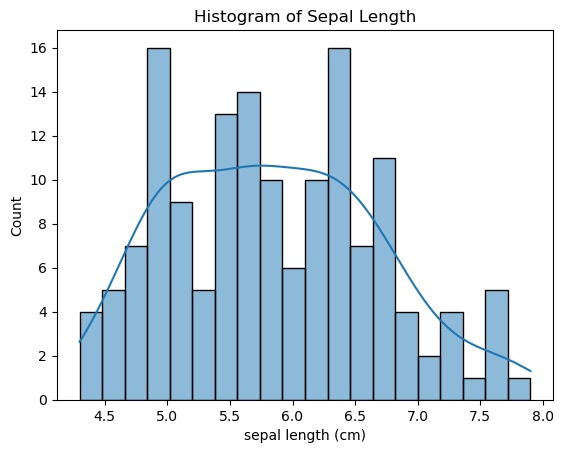

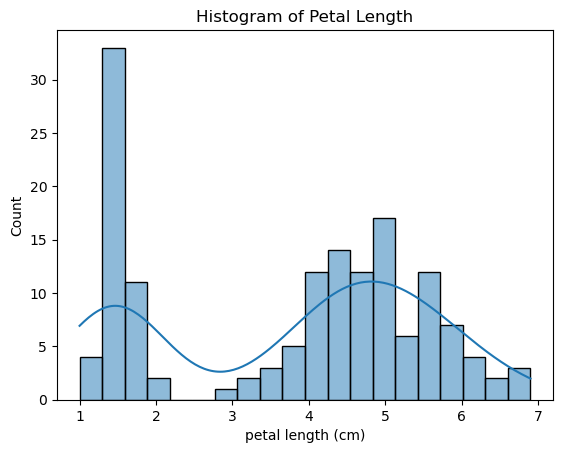

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.histplot(df['sepal length (cm)'], kde=True, bins=20)
plt.title('Histogram of Sepal Length')
plt.show()


sns.histplot(df['petal length (cm)'], kde=True, bins=20)
plt.title('Histogram of Petal Length')
plt.show()


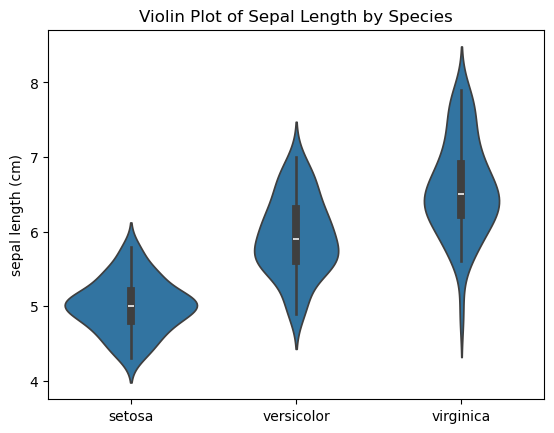

In [30]:
sns.violinplot(x=iris.target_names[iris.target], y=df['sepal length (cm)'])
plt.title('Violin Plot of Sepal Length by Species')
plt.show()


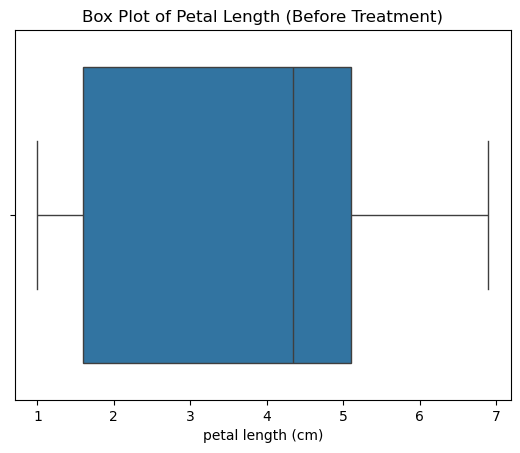

In [6]:
# Box plot before removing outliers
sns.boxplot(x=df['petal length (cm)'])
plt.title('Box Plot of Petal Length (Before Treatment)')
plt.show()


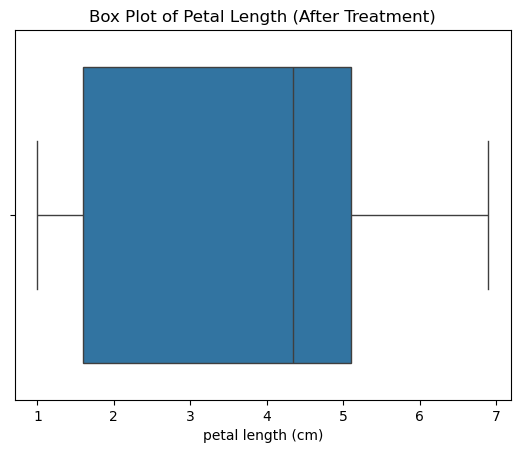

In [7]:
# Calculate IQR for petal length
Q1 = df['petal length (cm)'].quantile(0.25)
Q3 = df['petal length (cm)'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove rows with outliers
df_filtered = df[(df['petal length (cm)'] >= lower_bound) & (df['petal length (cm)'] <= upper_bound)]

# Box plot after outlier removal
sns.boxplot(x=df_filtered['petal length (cm)'])
plt.title('Box Plot of Petal Length (After Treatment)')
plt.show()


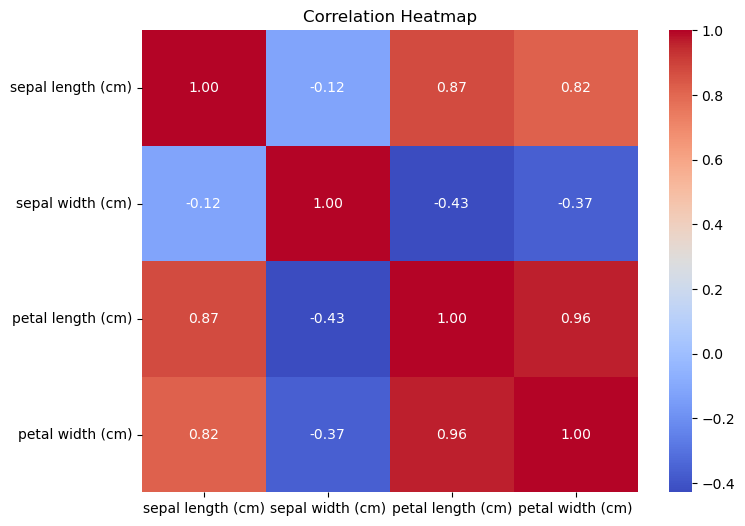

In [8]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [9]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Standardize the continuous variables (excluding the target column)
df_scaled = df.copy()
df_scaled.iloc[:, :] = scaler.fit_transform(df)

# Display the first few rows of the scaled data
print(df_scaled.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353          0.328414          -1.397064         -1.315444
3          -1.506521          0.098217          -1.283389         -1.315444
4          -1.021849          1.249201          -1.340227         -1.315444
